In [1]:
import importlib

import support as sp
import explore as exp
import constants as cn
importlib.reload(sp)
importlib.reload(exp)
importlib.reload(cn)

<module 'constants' from '/Users/miron/Desktop/Diploma/analysis/diplomus/constants.py'>

# 2011-03-11

- P_time_start = 13, 0
- P_time_stop = 24, 0
- Az_time_start = 15, 35
- Az_time_stop = 21, 35

In [2]:
P_time_start = 5, 30
P_time_stop = 8, 30
Az_time_start = 5, 30
Az_time_stop = 8, 30
p_back_cut=1

- __Для станций В06, В07, С09 получить временные ряды для полного вертик ускорения с учетом (az, ae, an и рельефа дна)__
- __Для полученных времменных рядов применить метод и получить долю хороших частот и дельту__

In [26]:
import relief 
import support as sp
import explore as exp
import importlib as ilb

import numpy as np
import seaborn as sns
ilb.reload(relief)
ilb.reload(sp)
ilb.reload(exp)

<module 'explore' from '/Users/miron/Desktop/Diploma/analysis/diplomus/explore.py'>

In [4]:
rel = relief.Relief(
    relief_path='data/relief_data/DONET1_136-137.5_32.5-34.dat',
    depth_stations_path='data/donet_list.csv'
)

100%|██████████████████████████████████| 32761/32761 [00:01<00:00, 19632.08it/s]


In [8]:
station_name = 'B08'
Az_path = f'data/az_metrics/201103110530_3h/EHZ_KM{station_name}_20110311T0530_3h_10Hz.dat'
Ae_path = f'data/ae_metrics/201103110530_3h/EHE_KM{station_name}_20110311T0530_3h_10Hz.dat'
An_path = f'data/an_metrics/201103110530_3h/EHN_KM{station_name}_20110311T0530_3h_10Hz.dat'
P_path = f'data/p_metrics/201103110530_3h/OYP_KM{station_name}_2011-03-11T053000_10.0Hz.dat'

In [9]:
az = sp.read_file2(Az_path, float) # без поочередной нормализации
ae = sp.read_file2(Ae_path, float) 
an = sp.read_file2(An_path, float) 

In [10]:
grad_e, grad_n = rel.stations.query(f'station == "{station_name.lower()}"')[['grad_east', 'grad_north']].iloc[0]

In [11]:
a_total = az + np.array(ae)*grad_e + np.array(an)*grad_n

In [12]:
np.array(an)

array([-0.17624244, -0.17621365, -0.17617252, ..., -0.17612957,
       -0.17603141, -0.1761825 ])

In [13]:
np.array(ae)

array([-0.0925213 , -0.09265021, -0.09257564, ..., -0.09159035,
       -0.09159008, -0.0913254 ])

In [14]:
np.array(az)

array([0.06883663, 0.06870125, 0.06883559, ..., 0.06886417, 0.06878615,
       0.06889754])

In [15]:
a_total

array([0.07508767, 0.07494856, 0.07508244, ..., 0.07512755, 0.07504509,
       0.07516829])

In [43]:
a = list(range(10))
b = list(range(20,40,2))

ka = 4
kb = 7

In [44]:
a = np.array([x - np.mean(a) for x in a])

array([-4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5])

In [45]:
b = np.array([x - np.mean(b) for x in b])

array([-9., -7., -5., -3., -1.,  1.,  3.,  5.,  7.,  9.])

In [41]:
rel.stations

,longitude,latitude,depth,station,grad,grad_east,grad_north,from_slope,H_depth
0,136.5570,33.8048,-2039,a01,0.024284,0.000649,0.024275,7809,3
1,136.6488,33.7524,-2011,a02,0.002253,-0.000649,0.002158,15606,7
2,136.6037,33.6484,-2063,a03,0.004035,-0.003888,0.001079,25435,12
3,136.4674,33.6781,-2054,a04,0.009796,0.001296,0.009710,16027,7
4,136.9264,33.4772,-1998,b05,0.042076,0.000000,-0.042076,7080,3
5,136.9216,33.3584,-2499,b06,0.043971,-0.032938,-0.029130,1902,0
6,136.8072,33.3613,-1980,b07,0.088448,-0.043272,0.077140,939,0
7,136.8039,33.4664,-1924,b08,0.049040,0.018753,-0.045313,9445,4
8,136.8313,33.0584,-3511,c09,0.105648,-0.046342,0.094942,190,0
9,136.9335,33.0533,-4247,c10,0.043737,0.001931,0.043695,1487,0


Время начала измерений: 5-30
Время конца измерений: 8-30
Проверка на равенство дополненных промежутков: True
Доля хороших частот = 0.984
Дельта = 0.079


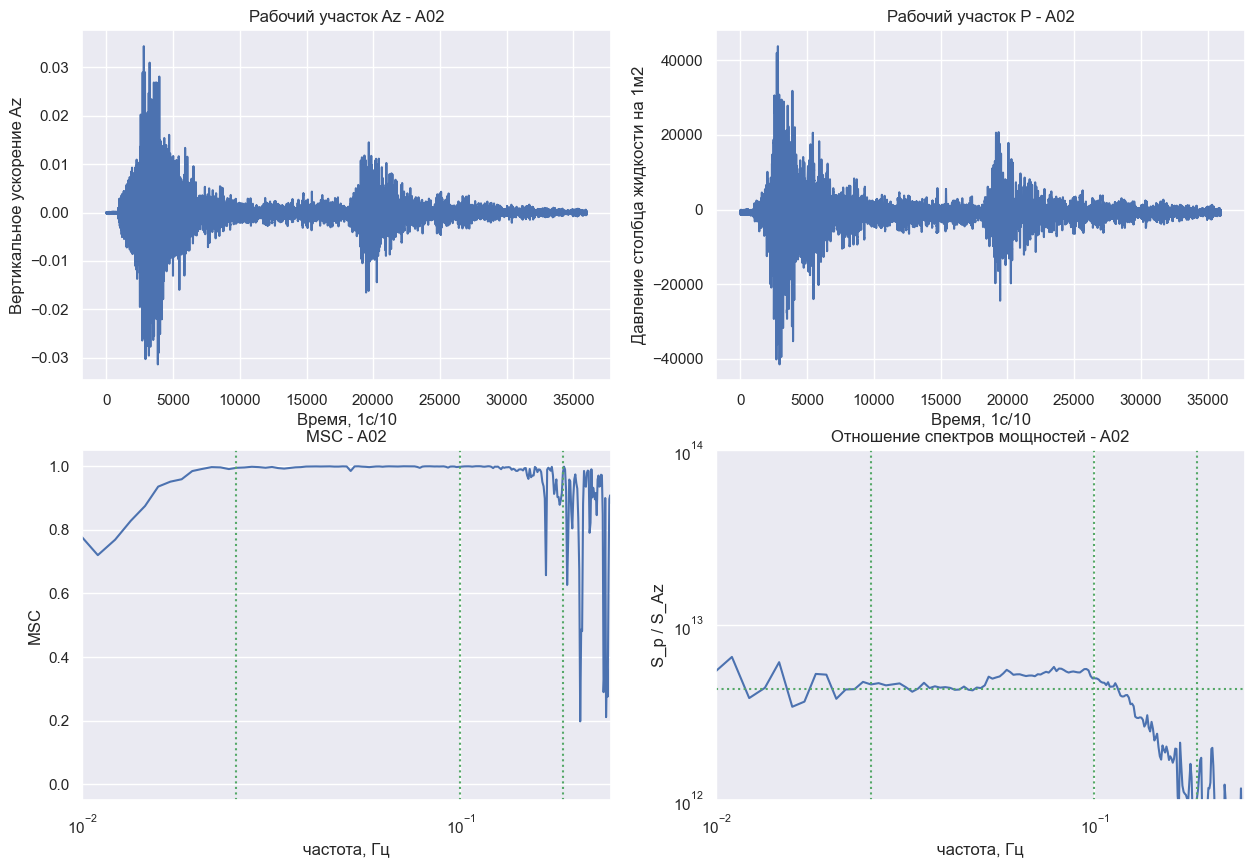

In [50]:
station_name = 'A02'
Az_path = f'data/az_metrics/201103110530_3h/EHZ_KM{station_name}_20110311T0530_3h_10Hz.dat'
Ae_path = f'data/ae_metrics/201103110530_3h/EHE_KM{station_name}_20110311T0530_3h_10Hz.dat'
An_path = f'data/an_metrics/201103110530_3h/EHN_KM{station_name}_20110311T0530_3h_10Hz.dat'
P_path = f'data/p_metrics/201103110530_3h/OYP_KM{station_name}_2011-03-11T053000_10.0Hz.dat'
# start_point=10000

height = cn.DIC_DEPTHS[station_name]
explorer = exp.StationExplorer(station_name, height, Az_path, P_path, P_time_start, P_time_stop, Az_time_start, Az_time_stop, 
                               period=1, start_point=10000, p_back_cut=p_back_cut
                               # ,ae_path=Ae_path, an_path=An_path, relief_obj=rel
                              )
explorer.run()

Время начала измерений: 5-30
Время конца измерений: 8-30
Проверка на равенство дополненных промежутков: True
Доля хороших частот = 0.984
Дельта = 0.079


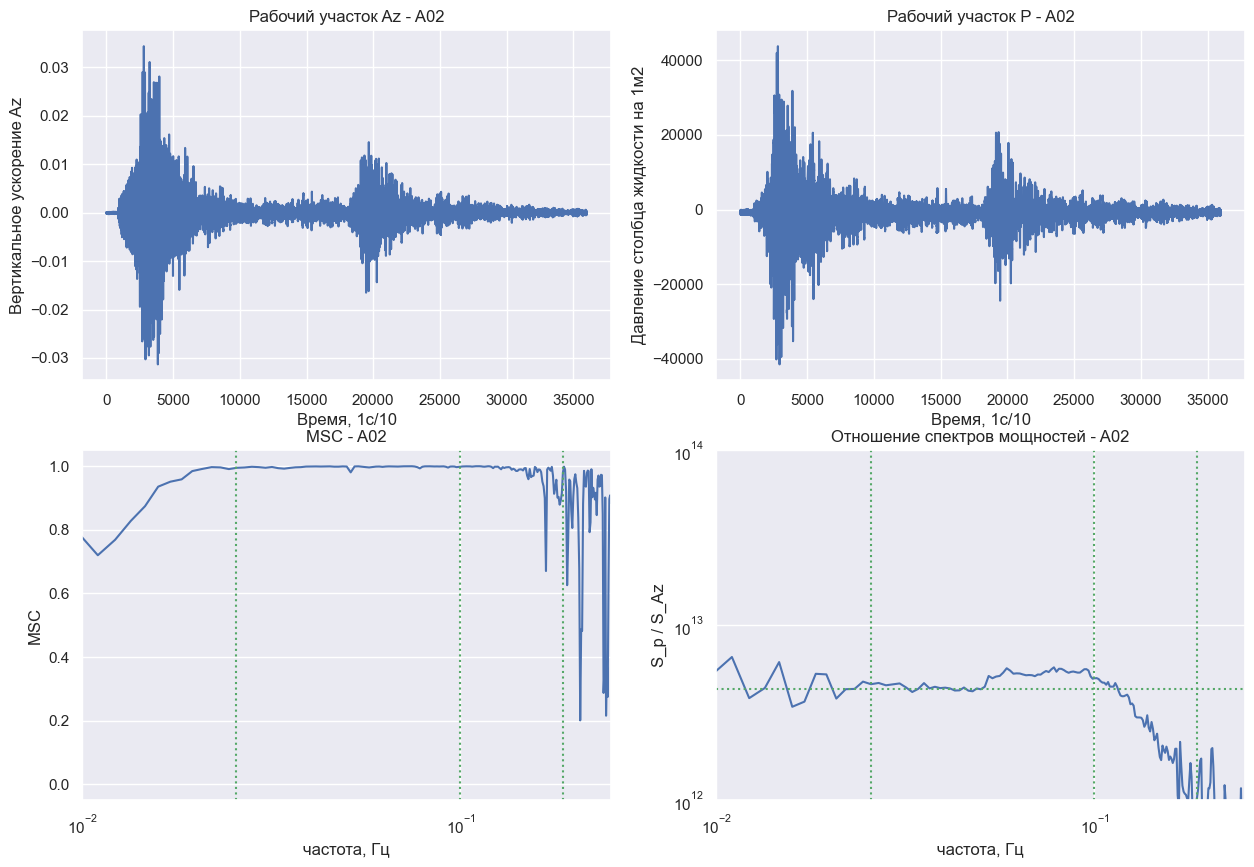

In [51]:
station_name = 'A02'
Az_path = f'data/az_metrics/201103110530_3h/EHZ_KM{station_name}_20110311T0530_3h_10Hz.dat'
Ae_path = f'data/ae_metrics/201103110530_3h/EHE_KM{station_name}_20110311T0530_3h_10Hz.dat'
An_path = f'data/an_metrics/201103110530_3h/EHN_KM{station_name}_20110311T0530_3h_10Hz.dat'
P_path = f'data/p_metrics/201103110530_3h/OYP_KM{station_name}_2011-03-11T053000_10.0Hz.dat'
# start_point=10000

height = cn.DIC_DEPTHS[station_name]
explorer = exp.StationExplorer(station_name, height, Az_path, P_path, P_time_start, P_time_stop, Az_time_start, Az_time_stop, 
                               period=1, start_point=10000, p_back_cut=p_back_cut
                               ,ae_path=Ae_path, an_path=An_path, relief_obj=rel
                              )
explorer.run()

Время начала измерений: 5-30
Время конца измерений: 8-30
Проверка на равенство дополненных промежутков: True
Доля хороших частот = 0.705
Дельта = 0.055


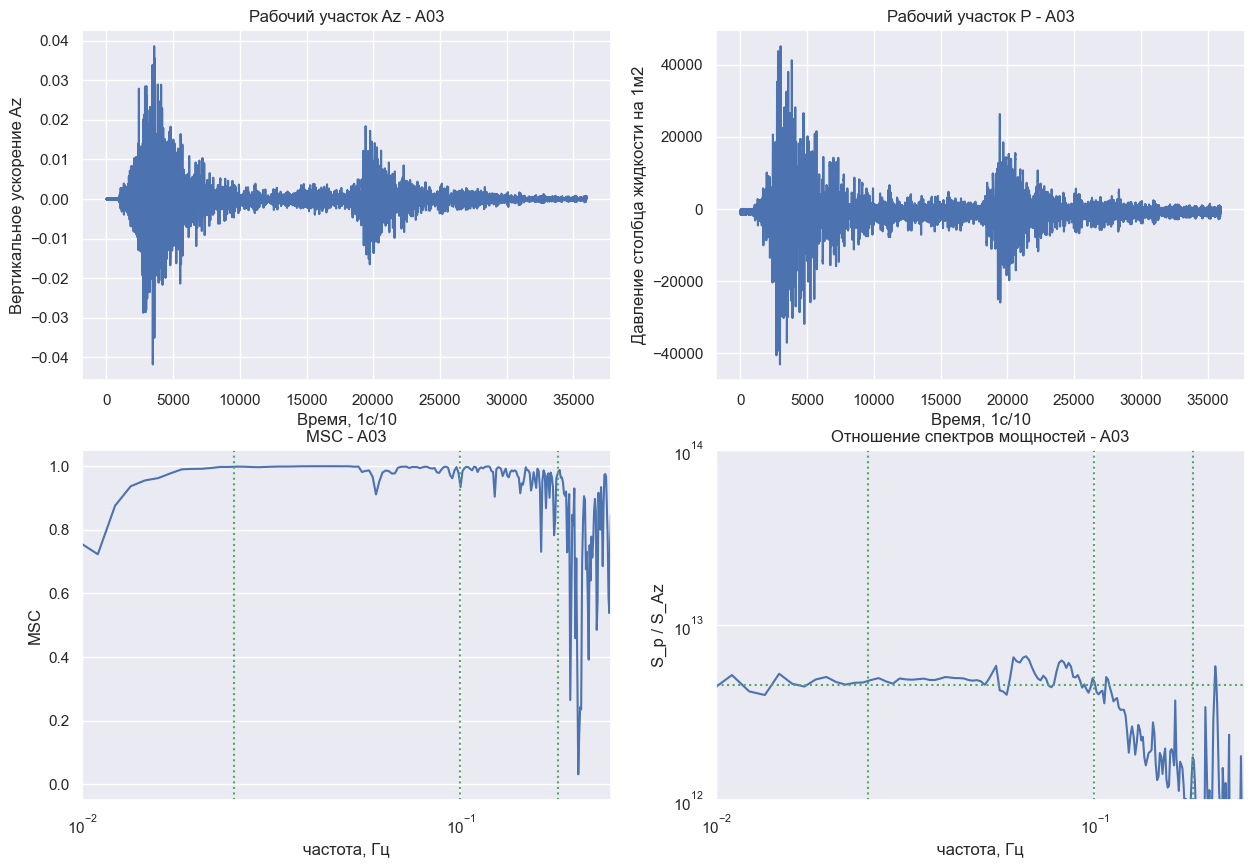

In [48]:
station_name = 'A03'
Az_path = f'data/az_metrics/201103110530_3h/EHZ_KM{station_name}_20110311T0530_3h_10Hz.dat'
Ae_path = f'data/ae_metrics/201103110530_3h/EHE_KM{station_name}_20110311T0530_3h_10Hz.dat'
An_path = f'data/an_metrics/201103110530_3h/EHN_KM{station_name}_20110311T0530_3h_10Hz.dat'
P_path = f'data/p_metrics/201103110530_3h/OYP_KM{station_name}_2011-03-11T053000_10.0Hz.dat'
# start_point=10000

height = cn.DIC_DEPTHS[station_name]
explorer = exp.StationExplorer(station_name, height, Az_path, P_path, P_time_start, P_time_stop, Az_time_start, Az_time_stop, 
                               period=1, start_point=10000, p_back_cut=p_back_cut
                               # ,ae_path=Ae_path, an_path=An_path, relief_obj=rel
                              )
explorer.run()

Время начала измерений: 5-30
Время конца измерений: 8-30
Проверка на равенство дополненных промежутков: True
Доля хороших частот = 0.705
Дельта = 0.052


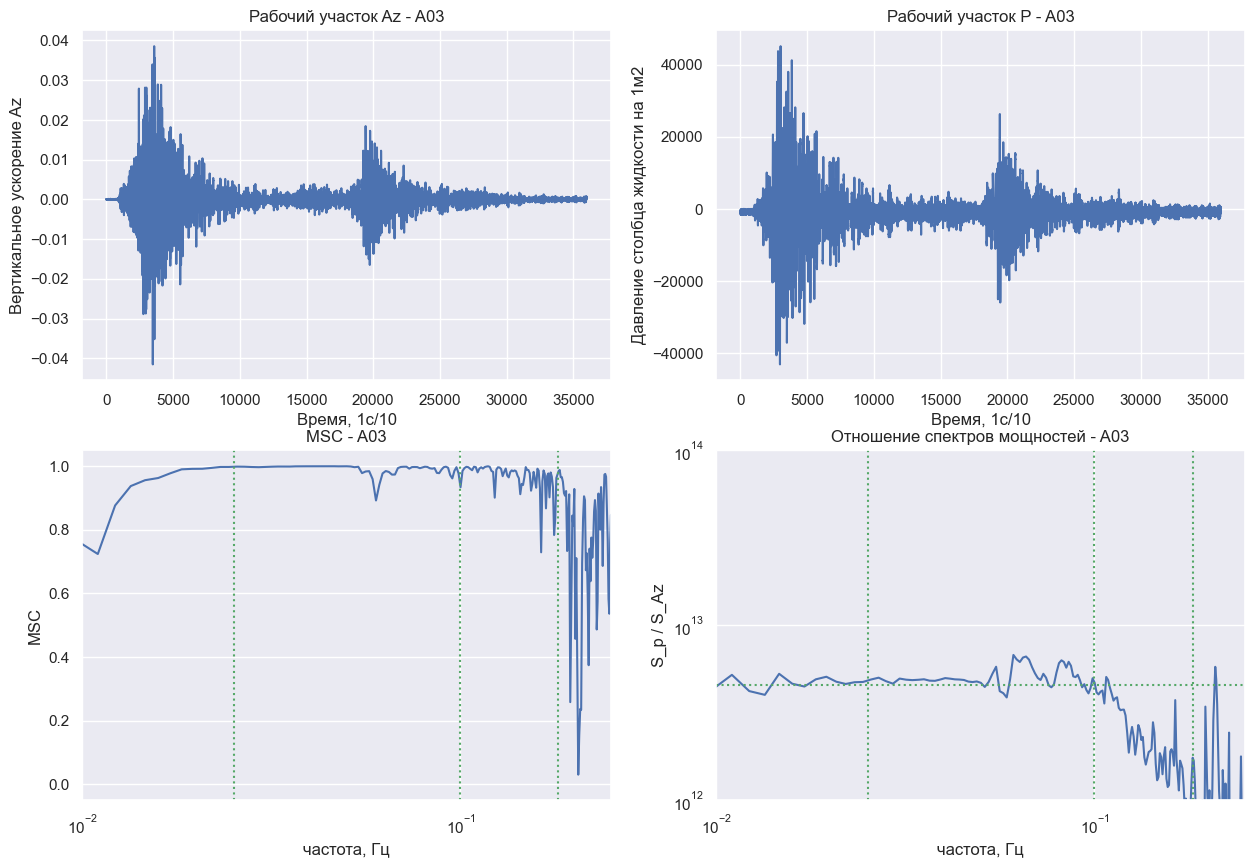

In [49]:
station_name = 'A03'
Az_path = f'data/az_metrics/201103110530_3h/EHZ_KM{station_name}_20110311T0530_3h_10Hz.dat'
Ae_path = f'data/ae_metrics/201103110530_3h/EHE_KM{station_name}_20110311T0530_3h_10Hz.dat'
An_path = f'data/an_metrics/201103110530_3h/EHN_KM{station_name}_20110311T0530_3h_10Hz.dat'
P_path = f'data/p_metrics/201103110530_3h/OYP_KM{station_name}_2011-03-11T053000_10.0Hz.dat'
# start_point=10000

height = cn.DIC_DEPTHS[station_name]
explorer = exp.StationExplorer(station_name, height, Az_path, P_path, P_time_start, P_time_stop, Az_time_start, Az_time_stop, 
                               period=1, start_point=10000, p_back_cut=p_back_cut
                               ,ae_path=Ae_path, an_path=An_path, relief_obj=rel
                              )
explorer.run()

Время начала измерений: 5-30
Время конца измерений: 8-30
Проверка на равенство дополненных промежутков: True
Доля хороших частот = 0.852
Дельта = 0.07


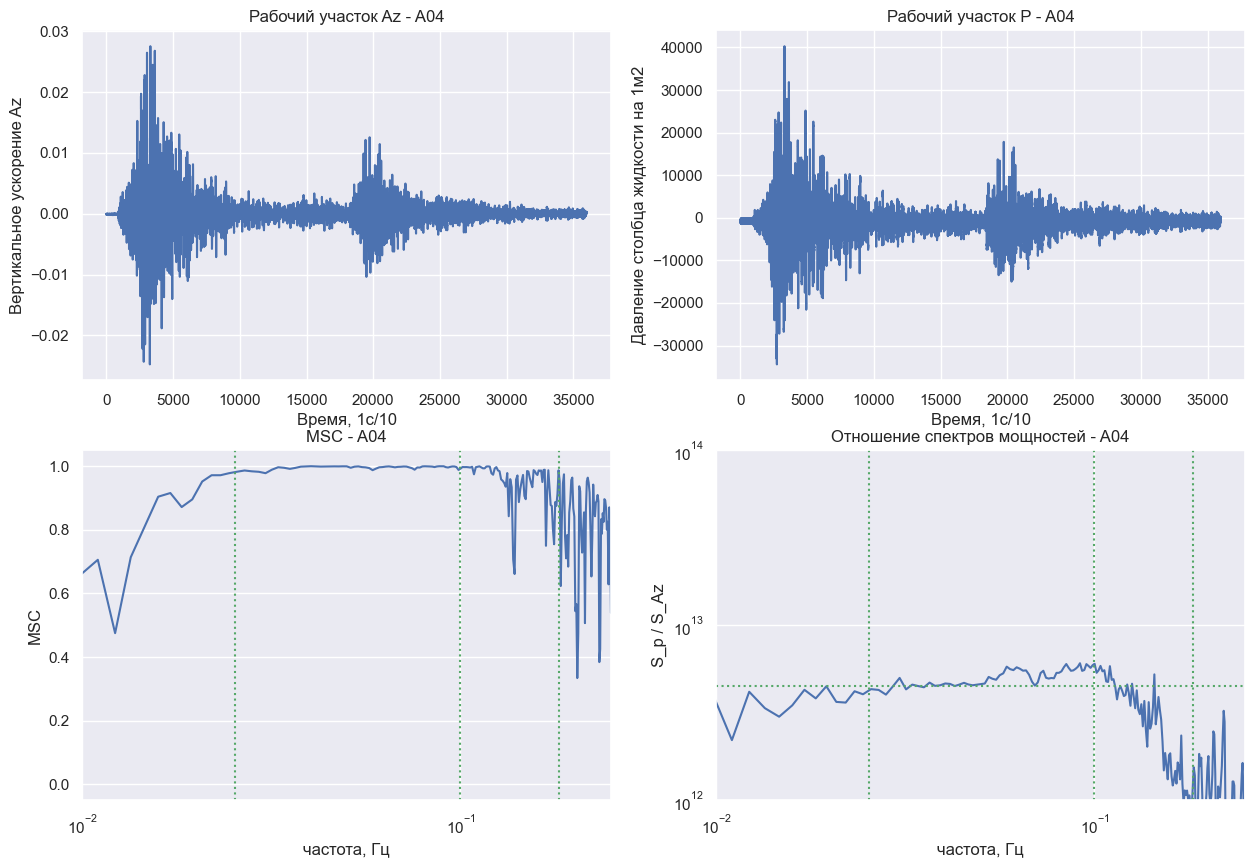

In [46]:
station_name = 'A04'
Az_path = f'data/az_metrics/201103110530_3h/EHZ_KM{station_name}_20110311T0530_3h_10Hz.dat'
Ae_path = f'data/ae_metrics/201103110530_3h/EHE_KM{station_name}_20110311T0530_3h_10Hz.dat'
An_path = f'data/an_metrics/201103110530_3h/EHN_KM{station_name}_20110311T0530_3h_10Hz.dat'
P_path = f'data/p_metrics/201103110530_3h/OYP_KM{station_name}_2011-03-11T053000_10.0Hz.dat'
# start_point=10000

height = cn.DIC_DEPTHS[station_name]
explorer = exp.StationExplorer(station_name, height, Az_path, P_path, P_time_start, P_time_stop, Az_time_start, Az_time_stop, 
                               period=1, start_point=10000, p_back_cut=p_back_cut
                               # ,ae_path=Ae_path, an_path=An_path, relief_obj=rel
                              )
explorer.run()

Время начала измерений: 5-30
Время конца измерений: 8-30
Проверка на равенство дополненных промежутков: True
Доля хороших частот = 0.803
Дельта = 0.065


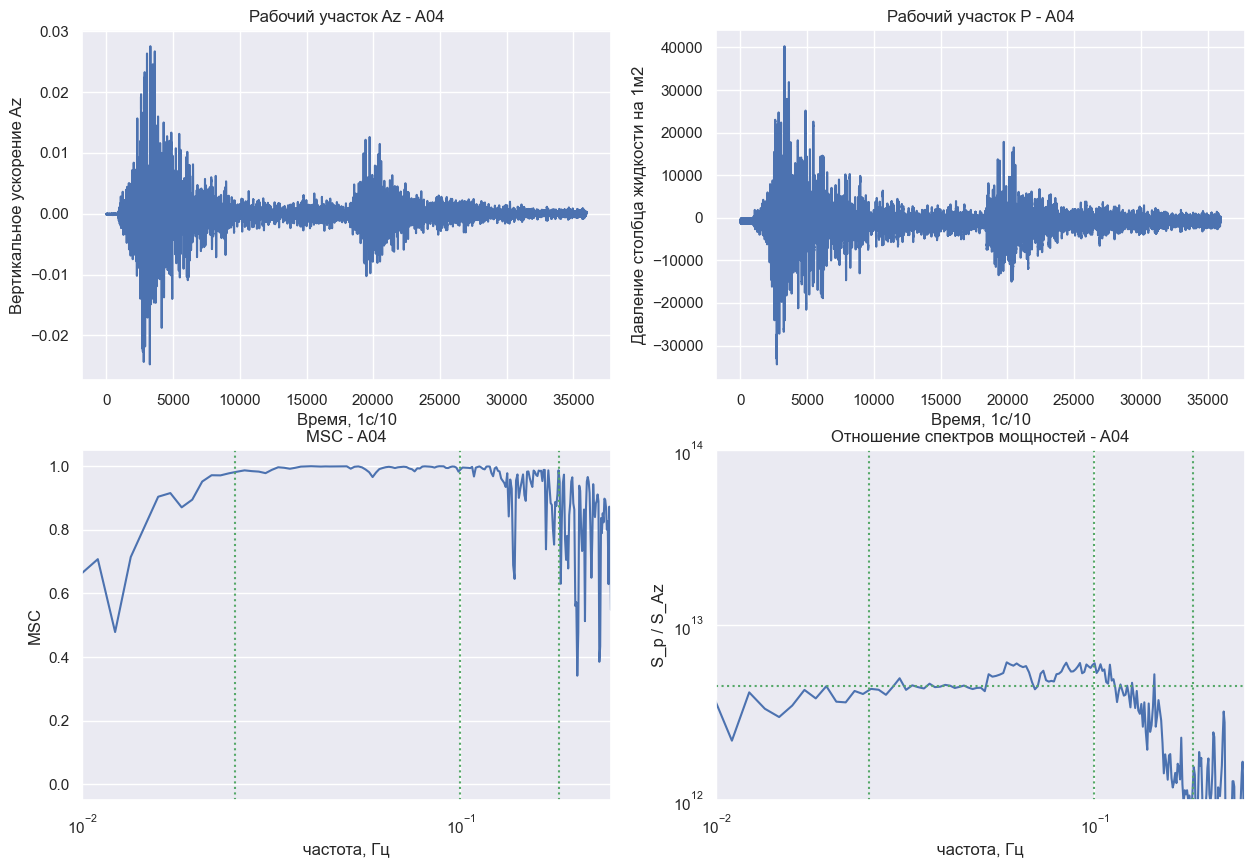

In [47]:
station_name = 'A04'
Az_path = f'data/az_metrics/201103110530_3h/EHZ_KM{station_name}_20110311T0530_3h_10Hz.dat'
Ae_path = f'data/ae_metrics/201103110530_3h/EHE_KM{station_name}_20110311T0530_3h_10Hz.dat'
An_path = f'data/an_metrics/201103110530_3h/EHN_KM{station_name}_20110311T0530_3h_10Hz.dat'
P_path = f'data/p_metrics/201103110530_3h/OYP_KM{station_name}_2011-03-11T053000_10.0Hz.dat'
# start_point=10000

height = cn.DIC_DEPTHS[station_name]
explorer = exp.StationExplorer(station_name, height, Az_path, P_path, P_time_start, P_time_stop, Az_time_start, Az_time_stop, 
                               period=1, start_point=10000, p_back_cut=p_back_cut
                               ,ae_path=Ae_path, an_path=An_path, relief_obj=rel
                              )
explorer.run()

Время начала измерений: 5-30
Время конца измерений: 8-30
Проверка на равенство дополненных промежутков: True
Доля хороших частот = 0.883
Дельта = 0.095


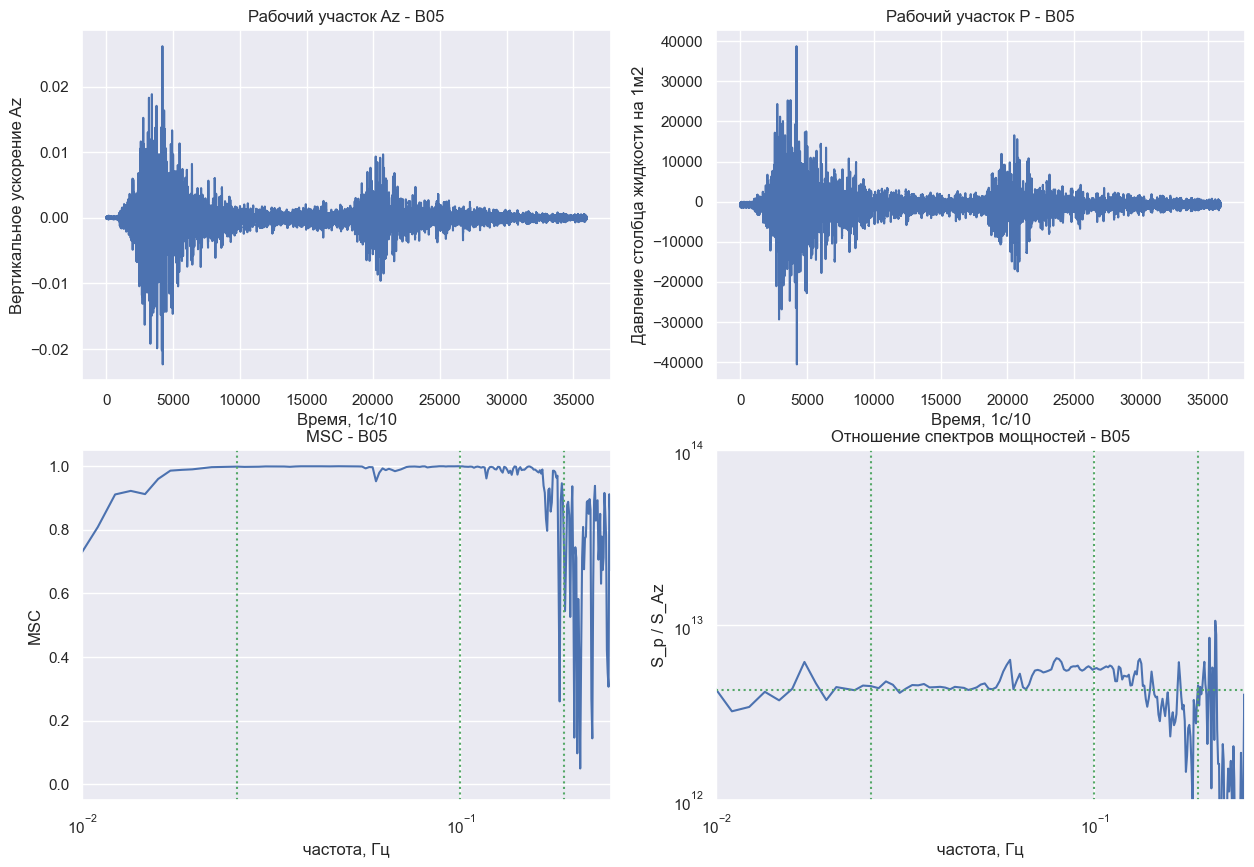

In [39]:
station_name = 'B05'
Az_path = f'data/az_metrics/201103110530_3h/EHZ_KM{station_name}_20110311T0530_3h_10Hz.dat'
Ae_path = f'data/ae_metrics/201103110530_3h/EHE_KM{station_name}_20110311T0530_3h_10Hz.dat'
An_path = f'data/an_metrics/201103110530_3h/EHN_KM{station_name}_20110311T0530_3h_10Hz.dat'
P_path = f'data/p_metrics/201103110530_3h/OYP_KM{station_name}_2011-03-11T053000_10.0Hz.dat'
# start_point=10000

height = cn.DIC_DEPTHS[station_name]
explorer = exp.StationExplorer(station_name, height, Az_path, P_path, P_time_start, P_time_stop, Az_time_start, Az_time_stop, 
                               period=1, start_point=10000, p_back_cut=p_back_cut
                               # ,ae_path=Ae_path, an_path=An_path, relief_obj=rel
                              )
explorer.run()

Время начала измерений: 5-30
Время конца измерений: 8-30
Проверка на равенство дополненных промежутков: True
Доля хороших частот = 0.9
Дельта = 0.091


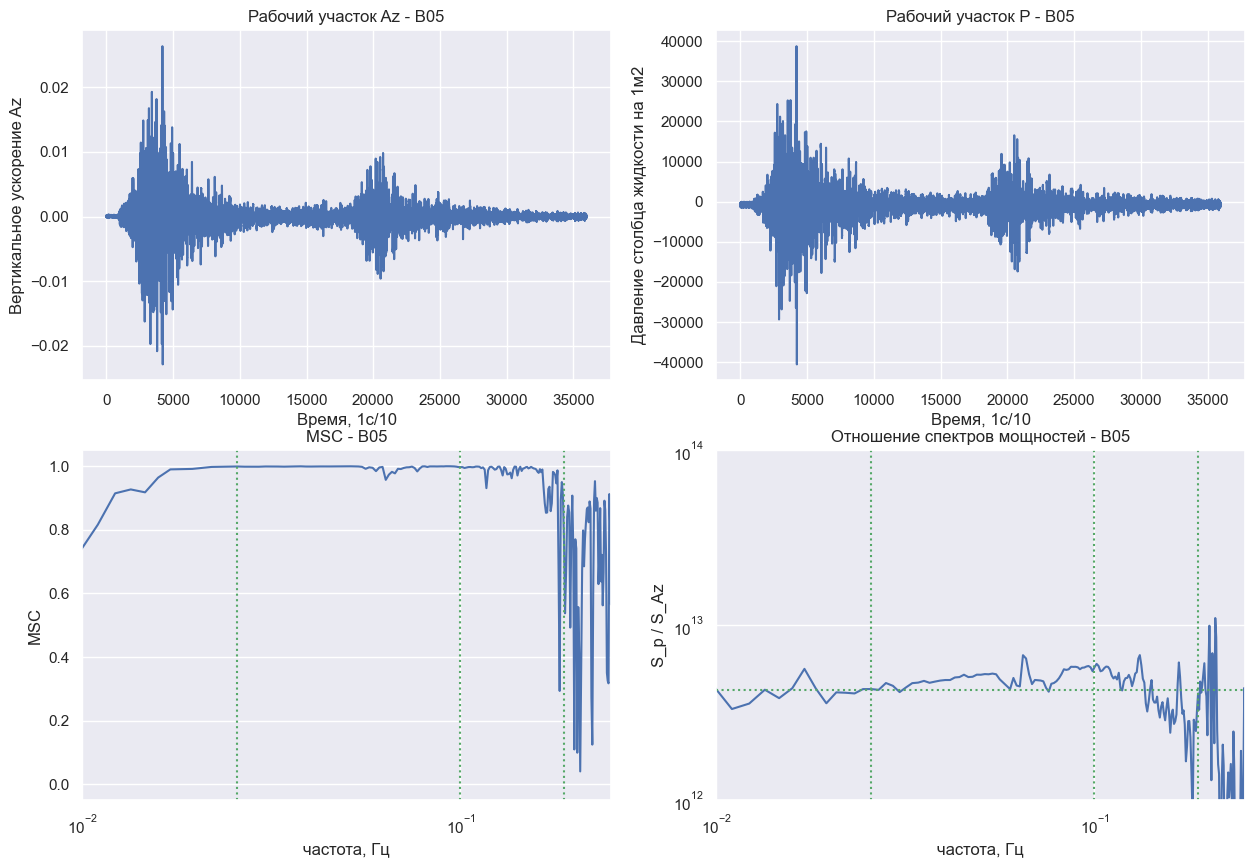

In [40]:
station_name = 'B05'
Az_path = f'data/az_metrics/201103110530_3h/EHZ_KM{station_name}_20110311T0530_3h_10Hz.dat'
Ae_path = f'data/ae_metrics/201103110530_3h/EHE_KM{station_name}_20110311T0530_3h_10Hz.dat'
An_path = f'data/an_metrics/201103110530_3h/EHN_KM{station_name}_20110311T0530_3h_10Hz.dat'
P_path = f'data/p_metrics/201103110530_3h/OYP_KM{station_name}_2011-03-11T053000_10.0Hz.dat'
# start_point=10000

height = cn.DIC_DEPTHS[station_name]
explorer = exp.StationExplorer(station_name, height, Az_path, P_path, P_time_start, P_time_stop, Az_time_start, Az_time_stop, 
                               period=1, start_point=10000, p_back_cut=p_back_cut
                               ,ae_path=Ae_path, an_path=An_path, relief_obj=rel
                              )
explorer.run()

Время начала измерений: 5-30
Время конца измерений: 8-30
Проверка на равенство дополненных промежутков: True
Доля хороших частот = 0.667
Дельта = 0.129


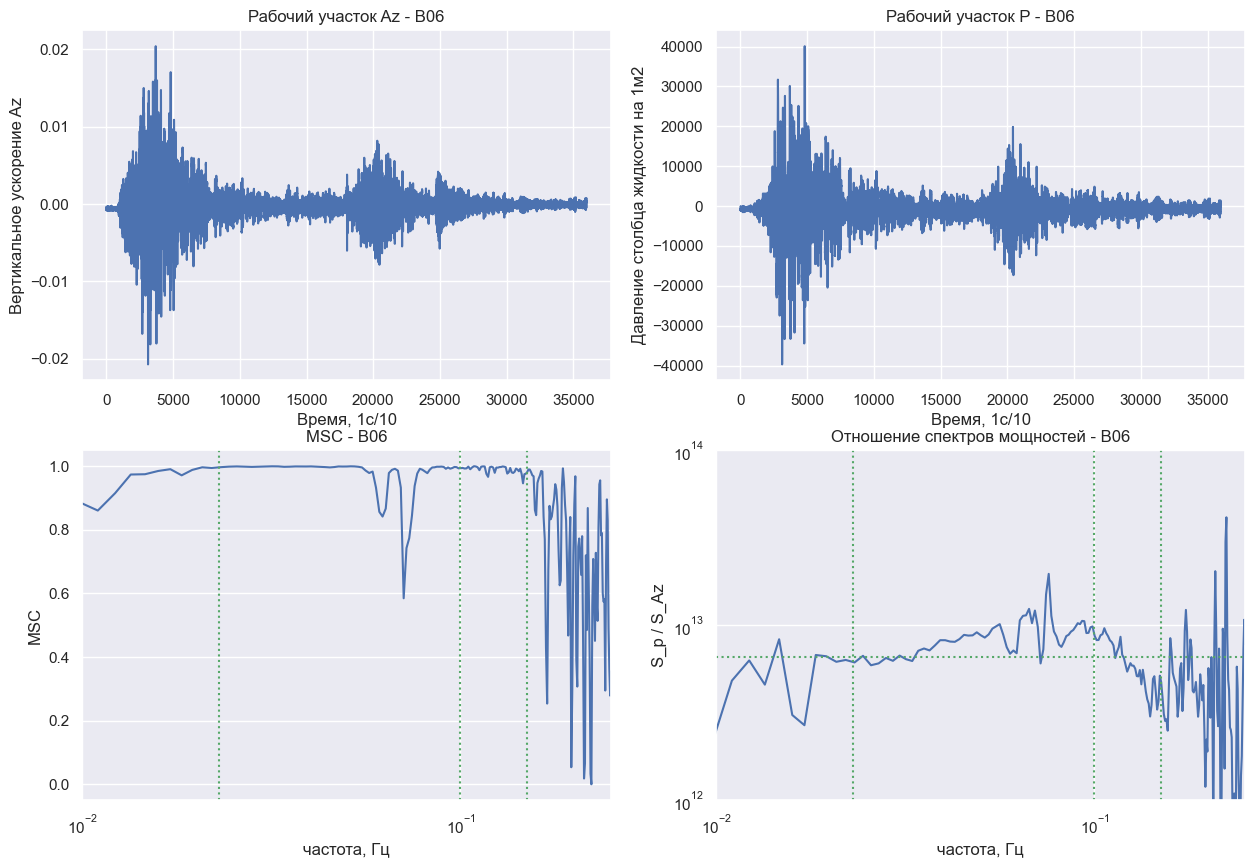

In [29]:
station_name = 'B06'
Az_path = f'data/az_metrics/201103110530_3h/EHZ_KM{station_name}_20110311T0530_3h_10Hz.dat'
Ae_path = f'data/ae_metrics/201103110530_3h/EHE_KM{station_name}_20110311T0530_3h_10Hz.dat'
An_path = f'data/an_metrics/201103110530_3h/EHN_KM{station_name}_20110311T0530_3h_10Hz.dat'
P_path = f'data/p_metrics/201103110530_3h/OYP_KM{station_name}_2011-03-11T053000_10.0Hz.dat'
# start_point=10000

height = cn.DIC_DEPTHS[station_name]
explorer = exp.StationExplorer(station_name, height, Az_path, P_path, P_time_start, P_time_stop, Az_time_start, Az_time_stop, 
                               period=1, start_point=10000, p_back_cut=p_back_cut
                               # ,ae_path=Ae_path, an_path=An_path, relief_obj=rel
                              )
explorer.run()

Время начала измерений: 5-30
Время конца измерений: 8-30
Проверка на равенство дополненных промежутков: True
Доля хороших частот = 0.587
Дельта = 0.134


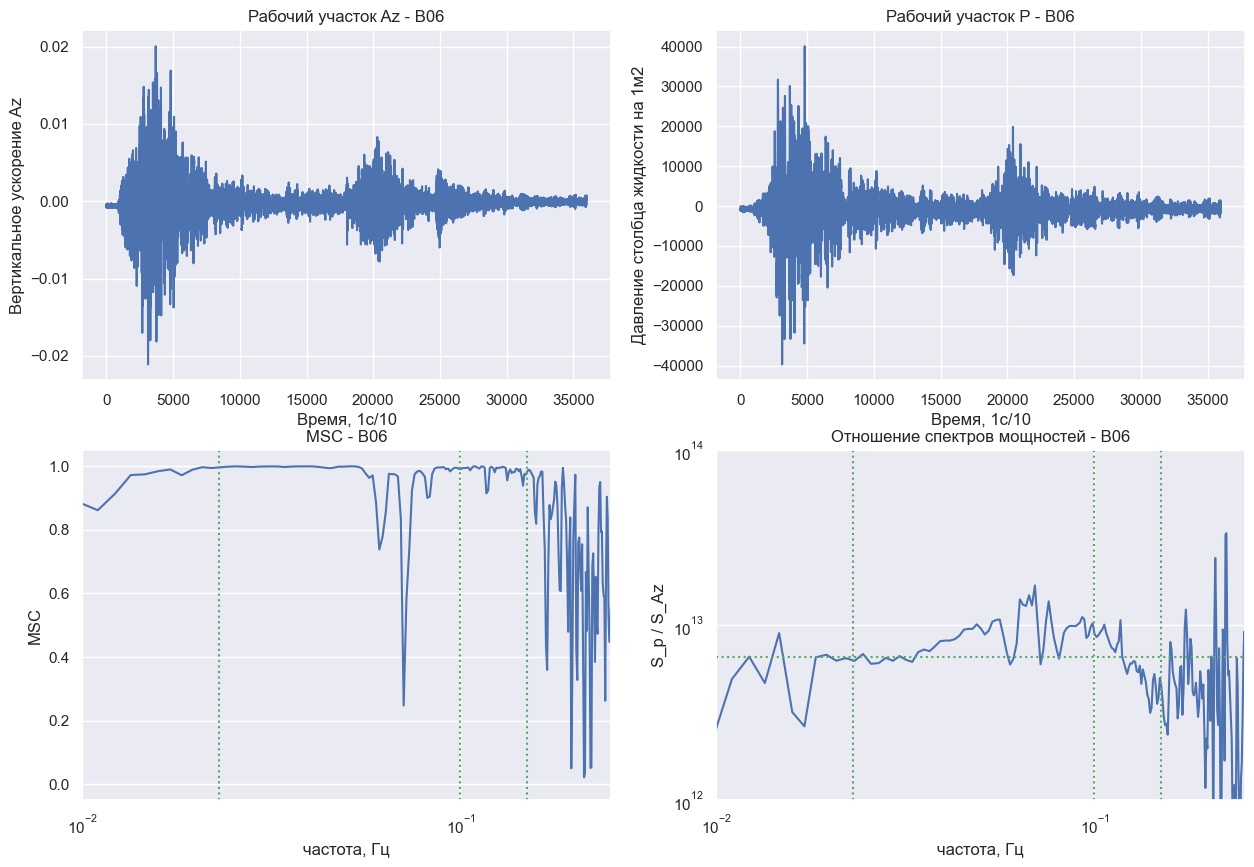

In [31]:
station_name = 'B06'
Az_path = f'data/az_metrics/201103110530_3h/EHZ_KM{station_name}_20110311T0530_3h_10Hz.dat'
Ae_path = f'data/ae_metrics/201103110530_3h/EHE_KM{station_name}_20110311T0530_3h_10Hz.dat'
An_path = f'data/an_metrics/201103110530_3h/EHN_KM{station_name}_20110311T0530_3h_10Hz.dat'
P_path = f'data/p_metrics/201103110530_3h/OYP_KM{station_name}_2011-03-11T053000_10.0Hz.dat'
# start_point=10000

height = cn.DIC_DEPTHS[station_name]
explorer = exp.StationExplorer(station_name, height, Az_path, P_path, P_time_start, P_time_stop, Az_time_start, Az_time_stop, 
                               period=1, start_point=10000, p_back_cut=p_back_cut
                               ,ae_path=Ae_path, an_path=An_path, relief_obj=rel
                              )
explorer.run()

In [16]:
# with open("B06.txt", "w") as output:
#     output.write(str(explorer.az))

Время начала измерений: 5-30
Время конца измерений: 8-30
Проверка на равенство дополненных промежутков: True
Доля хороших частот = 0.4
Дельта = 0.053


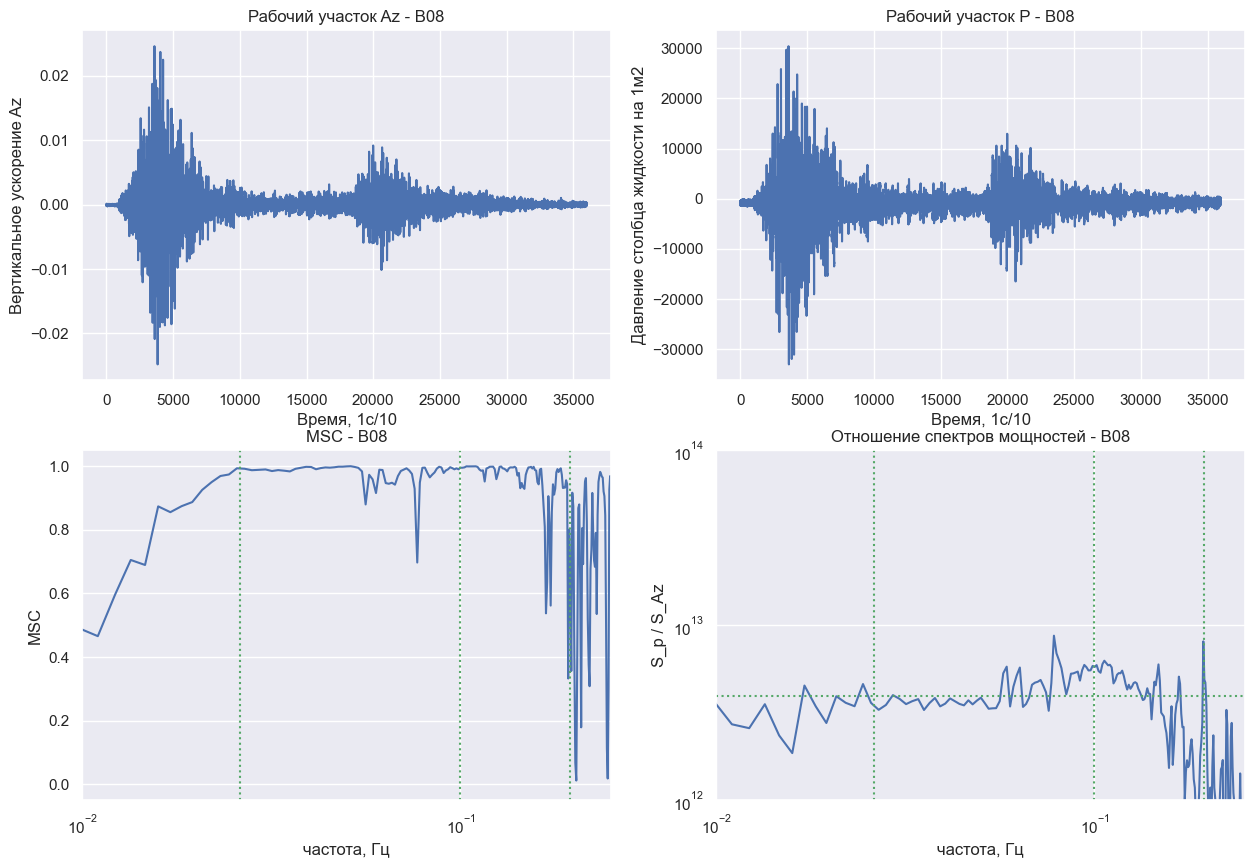

In [32]:
station_name = 'B08'
Az_path = f'data/az_metrics/201103110530_3h/EHZ_KM{station_name}_20110311T0530_3h_10Hz.dat'
Ae_path = f'data/ae_metrics/201103110530_3h/EHE_KM{station_name}_20110311T0530_3h_10Hz.dat'
An_path = f'data/an_metrics/201103110530_3h/EHN_KM{station_name}_20110311T0530_3h_10Hz.dat'
P_path = f'data/p_metrics/201103110530_3h/OYP_KM{station_name}_2011-03-11T053000_10.0Hz.dat'
# start_point=10000

height = cn.DIC_DEPTHS[station_name]
explorer = exp.StationExplorer(station_name, height, Az_path, P_path, P_time_start, P_time_stop, Az_time_start, Az_time_stop, 
                               period=1, start_point=10000, p_back_cut=p_back_cut
                               # ,ae_path=Ae_path, an_path=An_path, relief_obj=rel
                              )
explorer.run()

Время начала измерений: 5-30
Время конца измерений: 8-30
Проверка на равенство дополненных промежутков: True
Доля хороших частот = 0.733
Дельта = 0.091


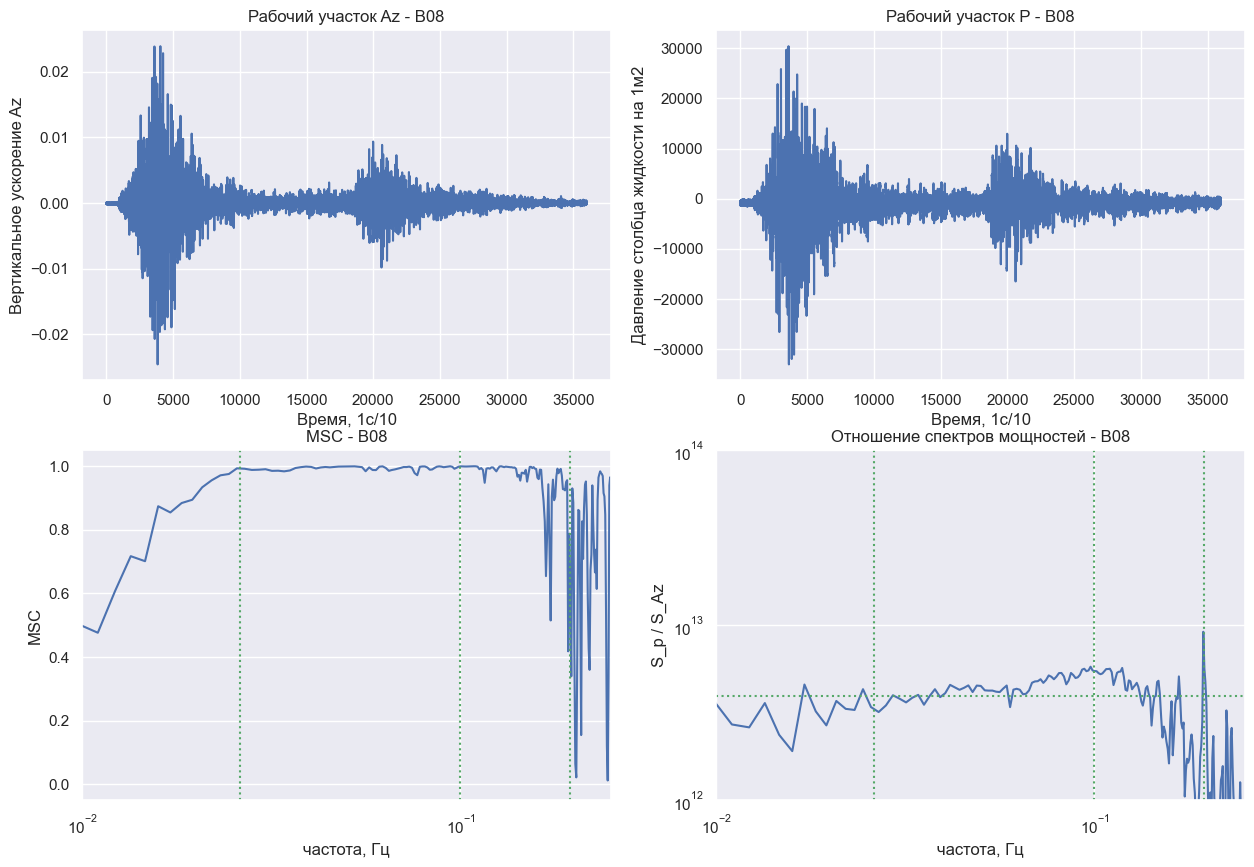

In [33]:
station_name = 'B08'
Az_path = f'data/az_metrics/201103110530_3h/EHZ_KM{station_name}_20110311T0530_3h_10Hz.dat'
Ae_path = f'data/ae_metrics/201103110530_3h/EHE_KM{station_name}_20110311T0530_3h_10Hz.dat'
An_path = f'data/an_metrics/201103110530_3h/EHN_KM{station_name}_20110311T0530_3h_10Hz.dat'
P_path = f'data/p_metrics/201103110530_3h/OYP_KM{station_name}_2011-03-11T053000_10.0Hz.dat'
# start_point=10000

height = cn.DIC_DEPTHS[station_name]
explorer = exp.StationExplorer(station_name, height, Az_path, P_path, P_time_start, P_time_stop, Az_time_start, Az_time_stop, 
                               period=1, start_point=10000, p_back_cut=p_back_cut
                               ,ae_path=Ae_path, an_path=An_path, relief_obj=rel
                              )
explorer.run()

In [18]:
# with open("B08.txt", "w") as output:
#     output.write(str(explorer.az))

Время начала измерений: 5-30
Время конца измерений: 8-30
Проверка на равенство дополненных промежутков: True
Доля хороших частот = 0.424
Дельта = 0.557


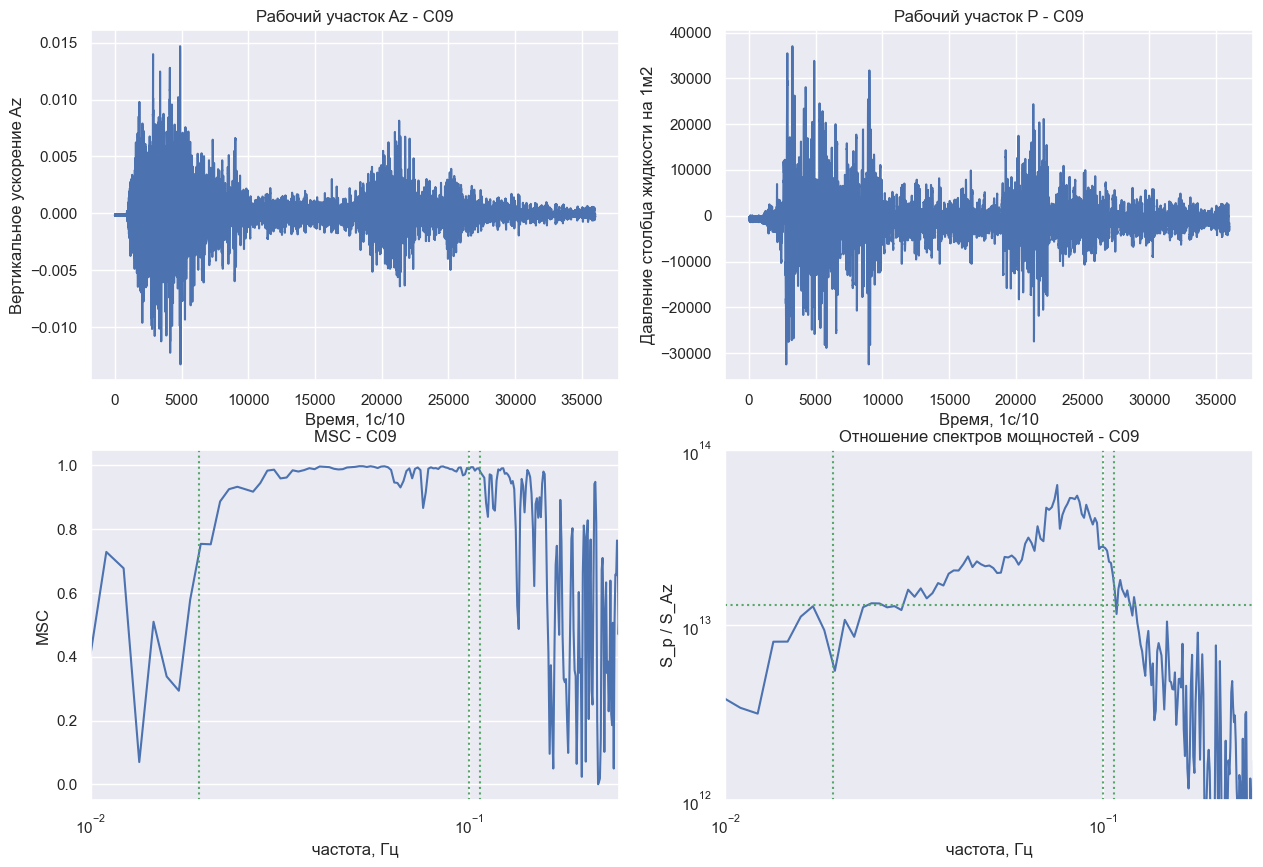

In [34]:
station_name = 'C09'
Az_path = f'data/az_metrics/201103110530_3h/EHZ_KM{station_name}_20110311T0530_3h_10Hz.dat'
Ae_path = f'data/ae_metrics/201103110530_3h/EHE_KM{station_name}_20110311T0530_3h_10Hz.dat'
An_path = f'data/an_metrics/201103110530_3h/EHN_KM{station_name}_20110311T0530_3h_10Hz.dat'
P_path = f'data/p_metrics/201103110530_3h/OYP_KM{station_name}_2011-03-11T053000_10.0Hz.dat'
# start_point=10000

height = cn.DIC_DEPTHS[station_name]
explorer = exp.StationExplorer(station_name, height, Az_path, P_path, P_time_start, P_time_stop, Az_time_start, Az_time_stop, 
                               period=1, start_point=10000, p_back_cut=p_back_cut
                               # ,ae_path=Ae_path, an_path=An_path, relief_obj=rel
                              )
explorer.run()

Время начала измерений: 5-30
Время конца измерений: 8-30
Проверка на равенство дополненных промежутков: True
Доля хороших частот = 0.439
Дельта = 0.418


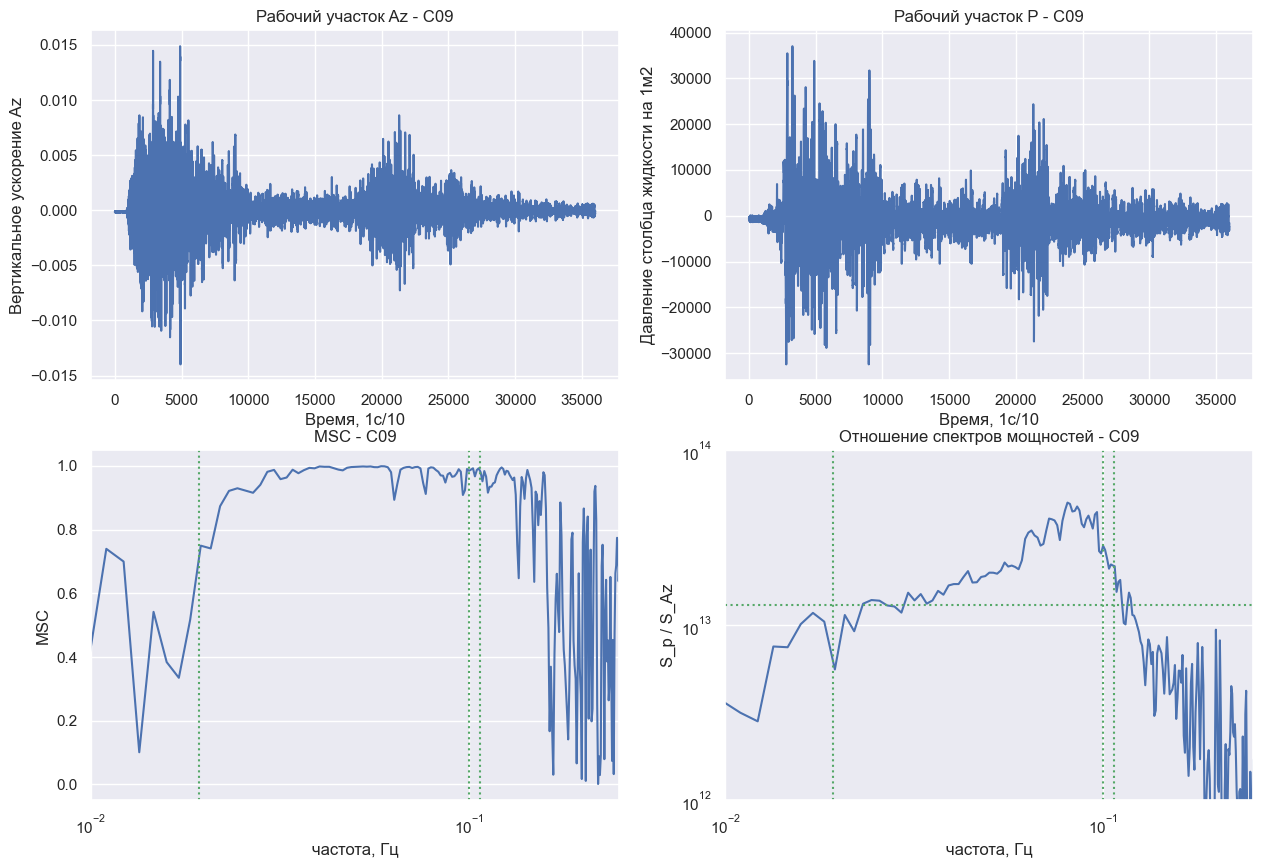

In [35]:
station_name = 'C09'
Az_path = f'data/az_metrics/201103110530_3h/EHZ_KM{station_name}_20110311T0530_3h_10Hz.dat'
Ae_path = f'data/ae_metrics/201103110530_3h/EHE_KM{station_name}_20110311T0530_3h_10Hz.dat'
An_path = f'data/an_metrics/201103110530_3h/EHN_KM{station_name}_20110311T0530_3h_10Hz.dat'
P_path = f'data/p_metrics/201103110530_3h/OYP_KM{station_name}_2011-03-11T053000_10.0Hz.dat'
# start_point=10000

height = cn.DIC_DEPTHS[station_name]
explorer = exp.StationExplorer(station_name, height, Az_path, P_path, P_time_start, P_time_stop, Az_time_start, Az_time_stop, 
                               period=1, start_point=10000, p_back_cut=p_back_cut
                               ,ae_path=Ae_path, an_path=An_path, relief_obj=rel
                              )
explorer.run()

In [20]:
# with open("C09.txt", "w") as output:
#     output.write(str(explorer.az))a

Время начала измерений: 5-30
Время конца измерений: 8-30
Проверка на равенство дополненных промежутков: True
Доля хороших частот = 0.883
Дельта = 0.09


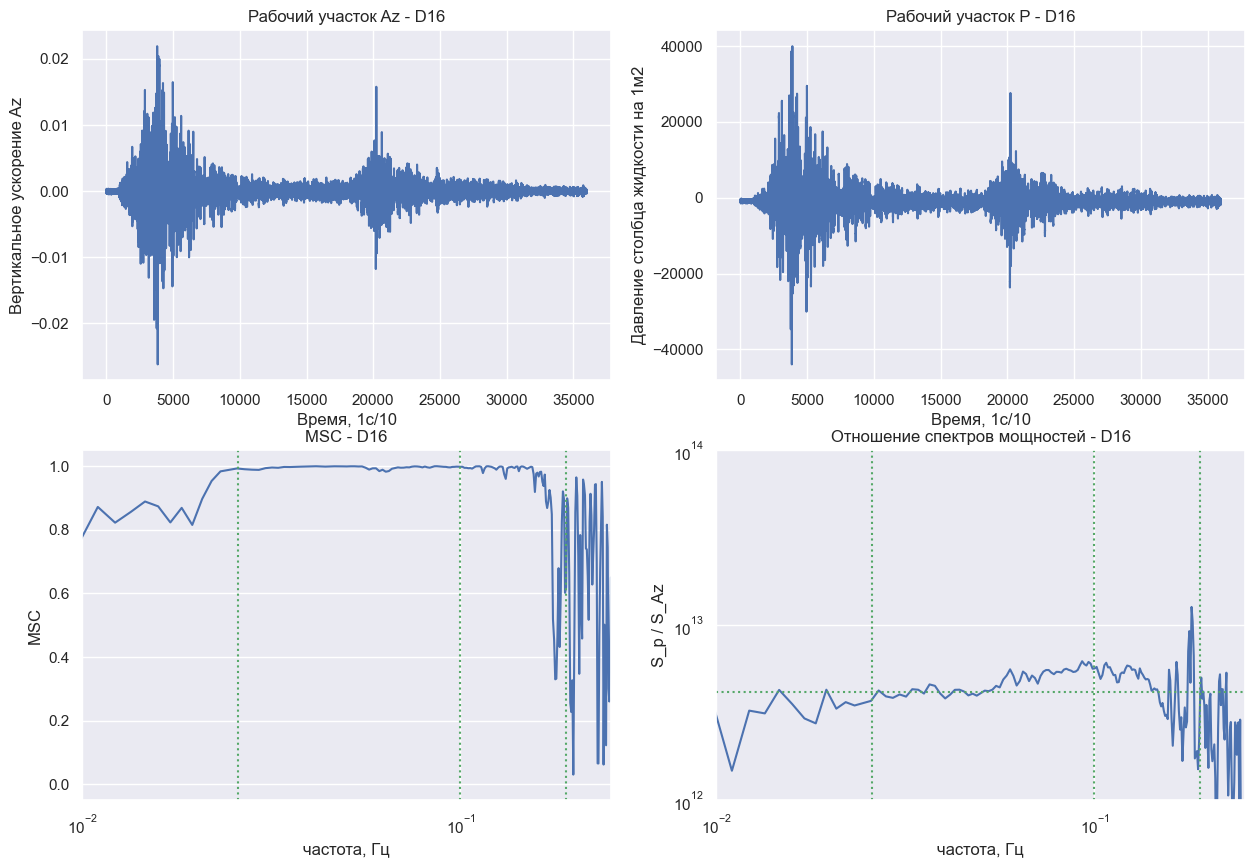

In [52]:
station_name = 'D16'
Az_path = f'data/az_metrics/201103110530_3h/EHZ_KM{station_name}_20110311T0530_3h_10Hz.dat'
Ae_path = f'data/ae_metrics/201103110530_3h/EHE_KM{station_name}_20110311T0530_3h_10Hz.dat'
An_path = f'data/an_metrics/201103110530_3h/EHN_KM{station_name}_20110311T0530_3h_10Hz.dat'
P_path = f'data/p_metrics/201103110530_3h/OYP_KM{station_name}_2011-03-11T053000_10.0Hz.dat'
# start_point=10000

height = cn.DIC_DEPTHS[station_name]
explorer = exp.StationExplorer(station_name, height, Az_path, P_path, P_time_start, P_time_stop, Az_time_start, Az_time_stop, 
                               period=1, start_point=10000, p_back_cut=p_back_cut
                               # ,ae_path=Ae_path, an_path=An_path, relief_obj=rel
                              )
explorer.run()

Время начала измерений: 5-30
Время конца измерений: 8-30
Проверка на равенство дополненных промежутков: True
Доля хороших частот = 0.9
Дельта = 0.097


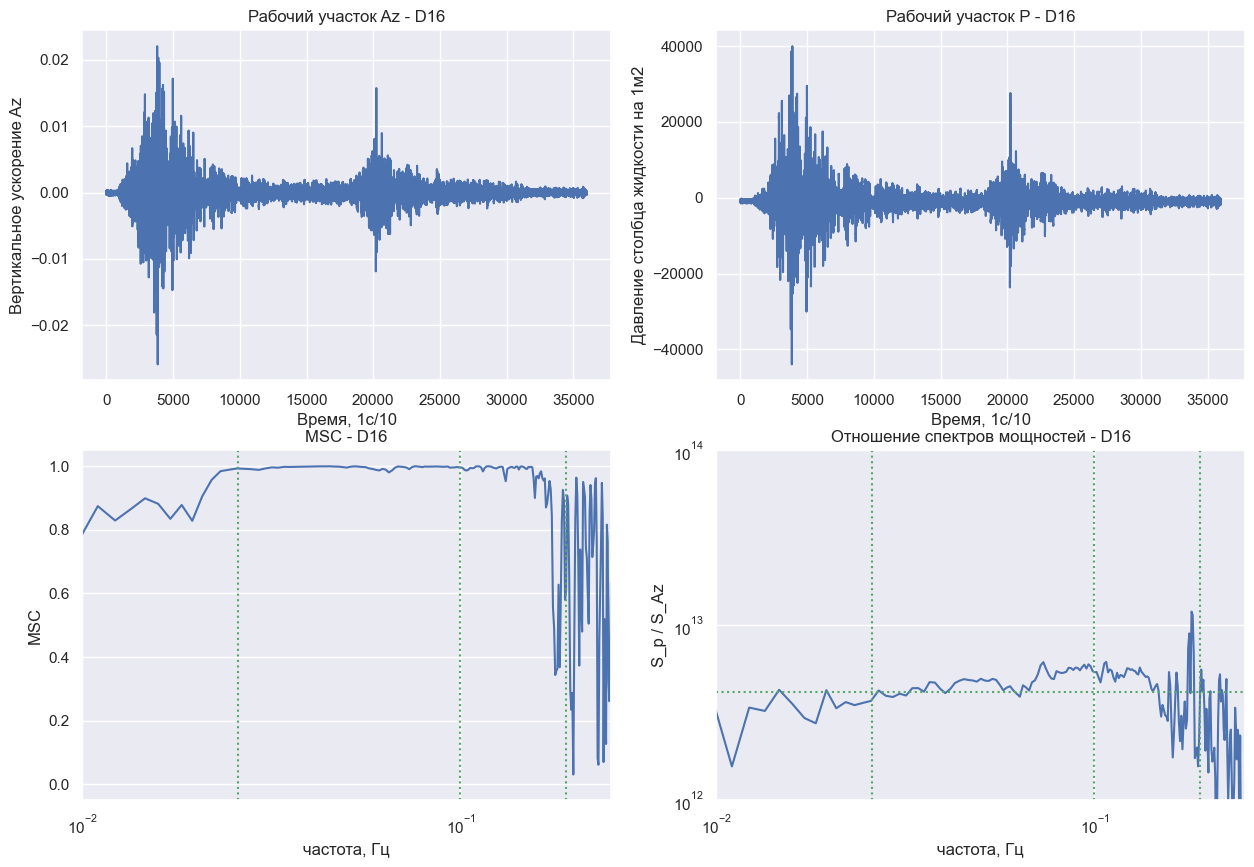

In [53]:
station_name = 'D16'
Az_path = f'data/az_metrics/201103110530_3h/EHZ_KM{station_name}_20110311T0530_3h_10Hz.dat'
Ae_path = f'data/ae_metrics/201103110530_3h/EHE_KM{station_name}_20110311T0530_3h_10Hz.dat'
An_path = f'data/an_metrics/201103110530_3h/EHN_KM{station_name}_20110311T0530_3h_10Hz.dat'
P_path = f'data/p_metrics/201103110530_3h/OYP_KM{station_name}_2011-03-11T053000_10.0Hz.dat'
# start_point=10000

height = cn.DIC_DEPTHS[station_name]
explorer = exp.StationExplorer(station_name, height, Az_path, P_path, P_time_start, P_time_stop, Az_time_start, Az_time_stop, 
                               period=1, start_point=10000, p_back_cut=p_back_cut
                               ,ae_path=Ae_path, an_path=An_path, relief_obj=rel
                              )
explorer.run()

Время начала измерений: 5-30
Время конца измерений: 8-30
Проверка на равенство дополненных промежутков: True
Доля хороших частот = 1.0
Дельта = 0.096


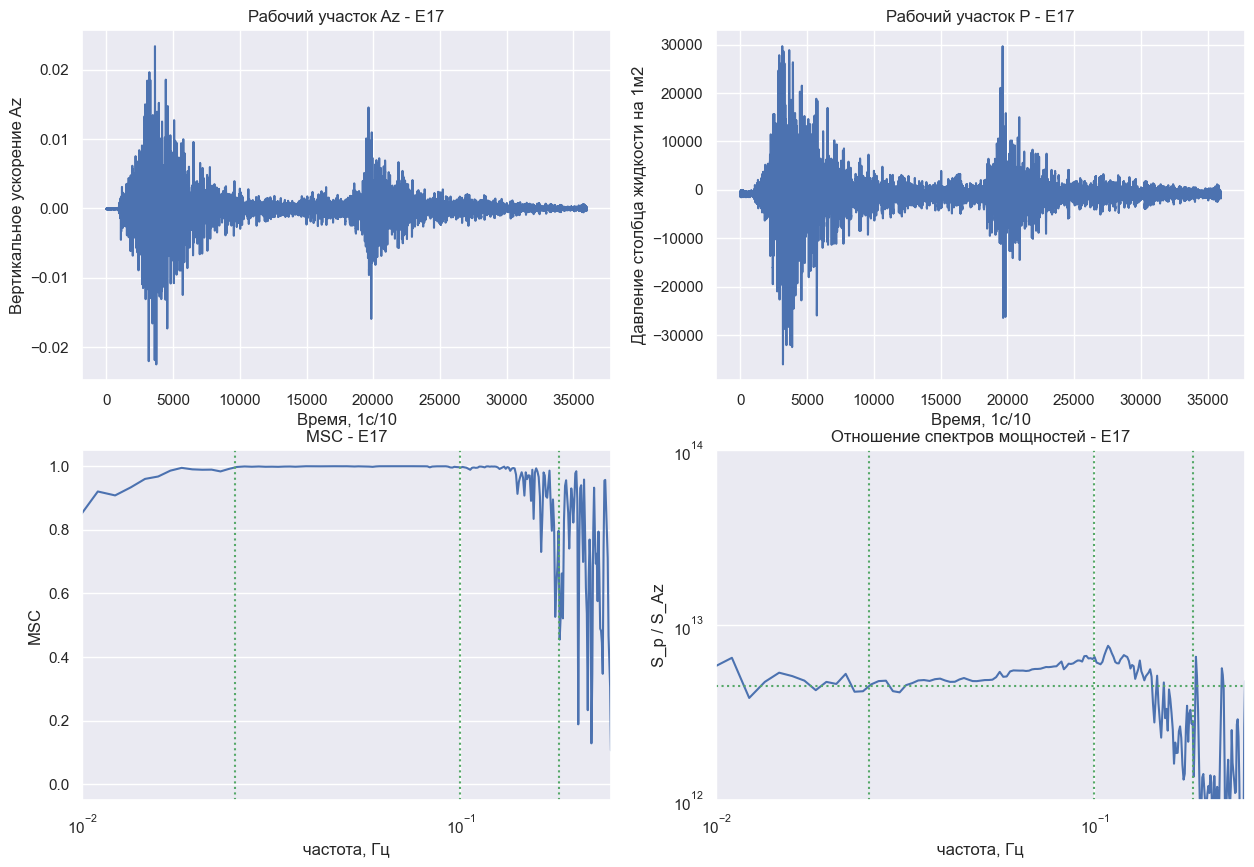

In [54]:
station_name = 'E17'
Az_path = f'data/az_metrics/201103110530_3h/EHZ_KM{station_name}_20110311T0530_3h_10Hz.dat'
Ae_path = f'data/ae_metrics/201103110530_3h/EHE_KM{station_name}_20110311T0530_3h_10Hz.dat'
An_path = f'data/an_metrics/201103110530_3h/EHN_KM{station_name}_20110311T0530_3h_10Hz.dat'
P_path = f'data/p_metrics/201103110530_3h/OYP_KM{station_name}_2011-03-11T053000_10.0Hz.dat'
# start_point=10000

height = cn.DIC_DEPTHS[station_name]
explorer = exp.StationExplorer(station_name, height, Az_path, P_path, P_time_start, P_time_stop, Az_time_start, Az_time_stop, 
                               period=1, start_point=10000, p_back_cut=p_back_cut
                               # ,ae_path=Ae_path, an_path=An_path, relief_obj=rel
                              )
explorer.run()

Время начала измерений: 5-30
Время конца измерений: 8-30
Проверка на равенство дополненных промежутков: True
Доля хороших частот = 1.0
Дельта = 0.097


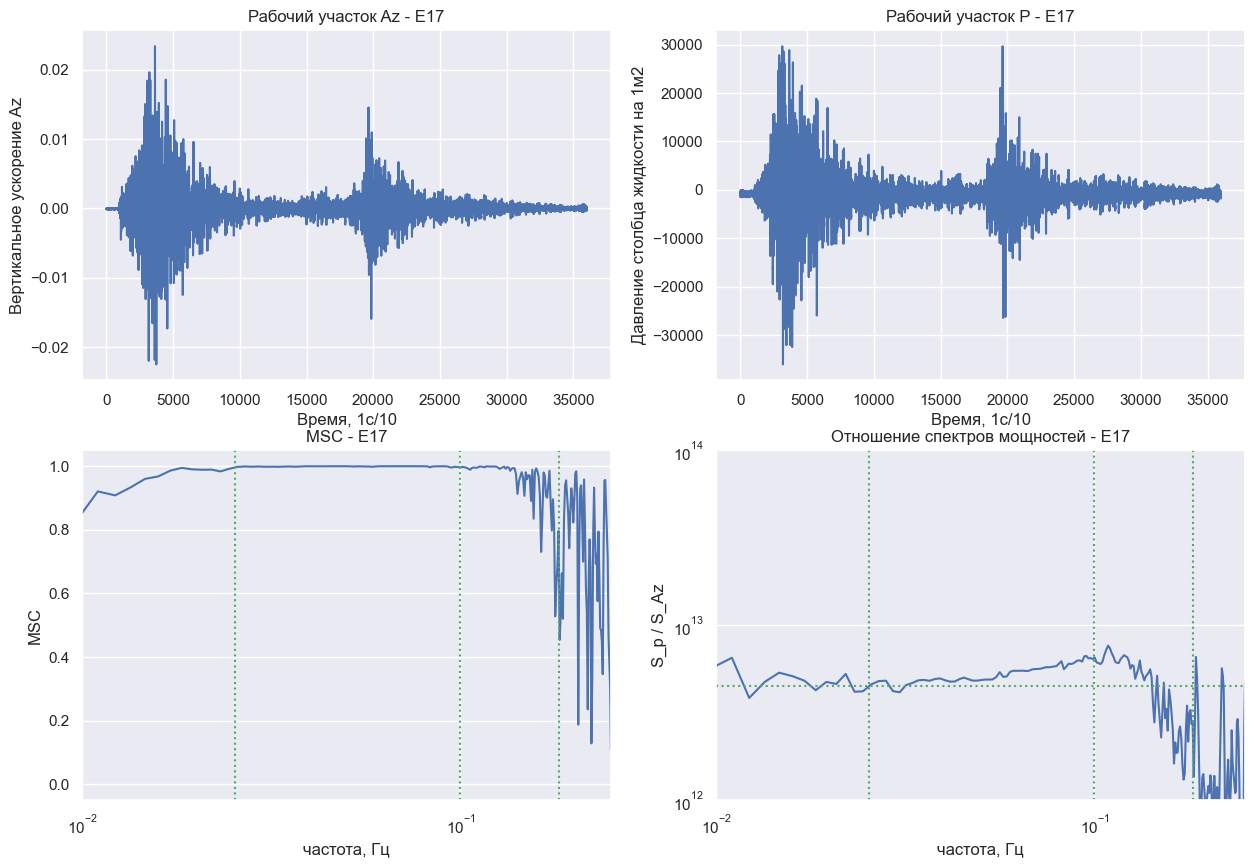

In [55]:
station_name = 'E17'
Az_path = f'data/az_metrics/201103110530_3h/EHZ_KM{station_name}_20110311T0530_3h_10Hz.dat'
Ae_path = f'data/ae_metrics/201103110530_3h/EHE_KM{station_name}_20110311T0530_3h_10Hz.dat'
An_path = f'data/an_metrics/201103110530_3h/EHN_KM{station_name}_20110311T0530_3h_10Hz.dat'
P_path = f'data/p_metrics/201103110530_3h/OYP_KM{station_name}_2011-03-11T053000_10.0Hz.dat'
# start_point=10000

height = cn.DIC_DEPTHS[station_name]
explorer = exp.StationExplorer(station_name, height, Az_path, P_path, P_time_start, P_time_stop, Az_time_start, Az_time_stop, 
                               period=1, start_point=10000, p_back_cut=p_back_cut
                               ,ae_path=Ae_path, an_path=An_path, relief_obj=rel
                              )
explorer.run()

Время начала измерений: 5-30
Время конца измерений: 8-30
Проверка на равенство дополненных промежутков: True
Доля хороших частот = 0.82
Дельта = 0.693


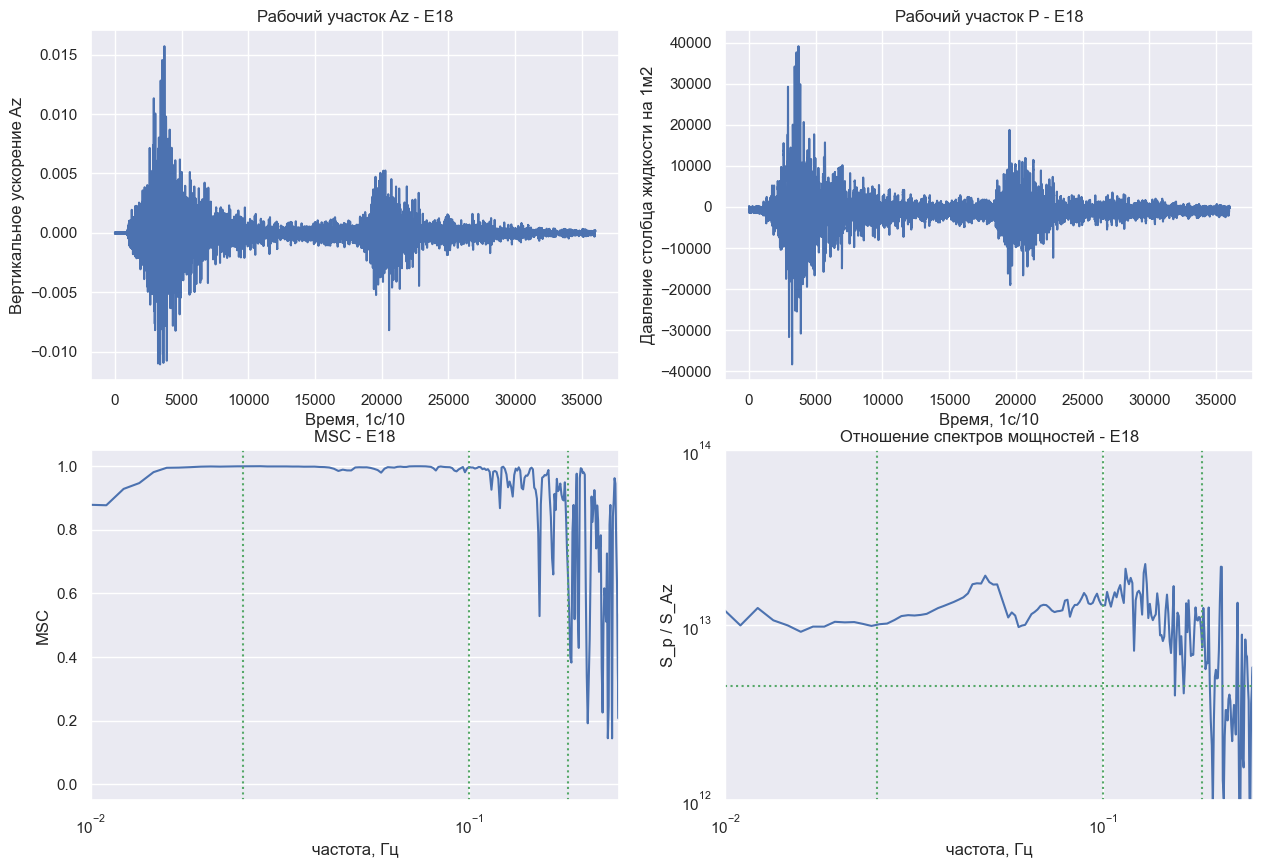

In [56]:
station_name = 'E18'
Az_path = f'data/az_metrics/201103110530_3h/EHZ_KM{station_name}_20110311T0530_3h_10Hz.dat'
Ae_path = f'data/ae_metrics/201103110530_3h/EHE_KM{station_name}_20110311T0530_3h_10Hz.dat'
An_path = f'data/an_metrics/201103110530_3h/EHN_KM{station_name}_20110311T0530_3h_10Hz.dat'
P_path = f'data/p_metrics/201103110530_3h/OYP_KM{station_name}_2011-03-11T053000_10.0Hz.dat'
# start_point=10000

height = cn.DIC_DEPTHS[station_name]
explorer = exp.StationExplorer(station_name, height, Az_path, P_path, P_time_start, P_time_stop, Az_time_start, Az_time_stop, 
                               period=1, start_point=10000, p_back_cut=p_back_cut
                               # ,ae_path=Ae_path, an_path=An_path, relief_obj=rel
                              )
explorer.run()

Время начала измерений: 5-30
Время конца измерений: 8-30
Проверка на равенство дополненных промежутков: True
Доля хороших частот = 0.787
Дельта = 0.698


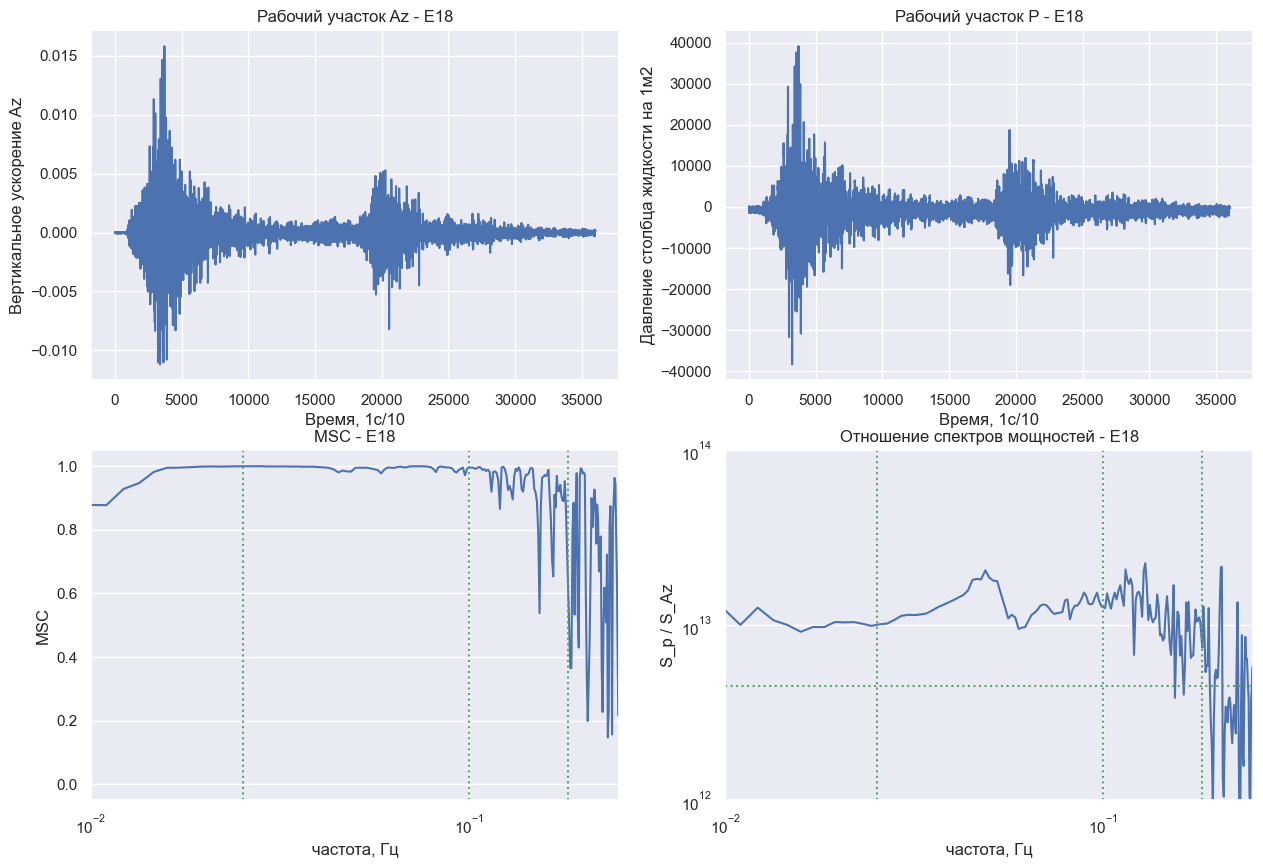

In [57]:
station_name = 'E18'
Az_path = f'data/az_metrics/201103110530_3h/EHZ_KM{station_name}_20110311T0530_3h_10Hz.dat'
Ae_path = f'data/ae_metrics/201103110530_3h/EHE_KM{station_name}_20110311T0530_3h_10Hz.dat'
An_path = f'data/an_metrics/201103110530_3h/EHN_KM{station_name}_20110311T0530_3h_10Hz.dat'
P_path = f'data/p_metrics/201103110530_3h/OYP_KM{station_name}_2011-03-11T053000_10.0Hz.dat'
# start_point=10000

height = cn.DIC_DEPTHS[station_name]
explorer = exp.StationExplorer(station_name, height, Az_path, P_path, P_time_start, P_time_stop, Az_time_start, Az_time_stop, 
                               period=1, start_point=10000, p_back_cut=p_back_cut
                               ,ae_path=Ae_path, an_path=An_path, relief_obj=rel
                              )
explorer.run()

- написать алгоритм для В06 и С09 для нахождения оптимального Кх и Ку